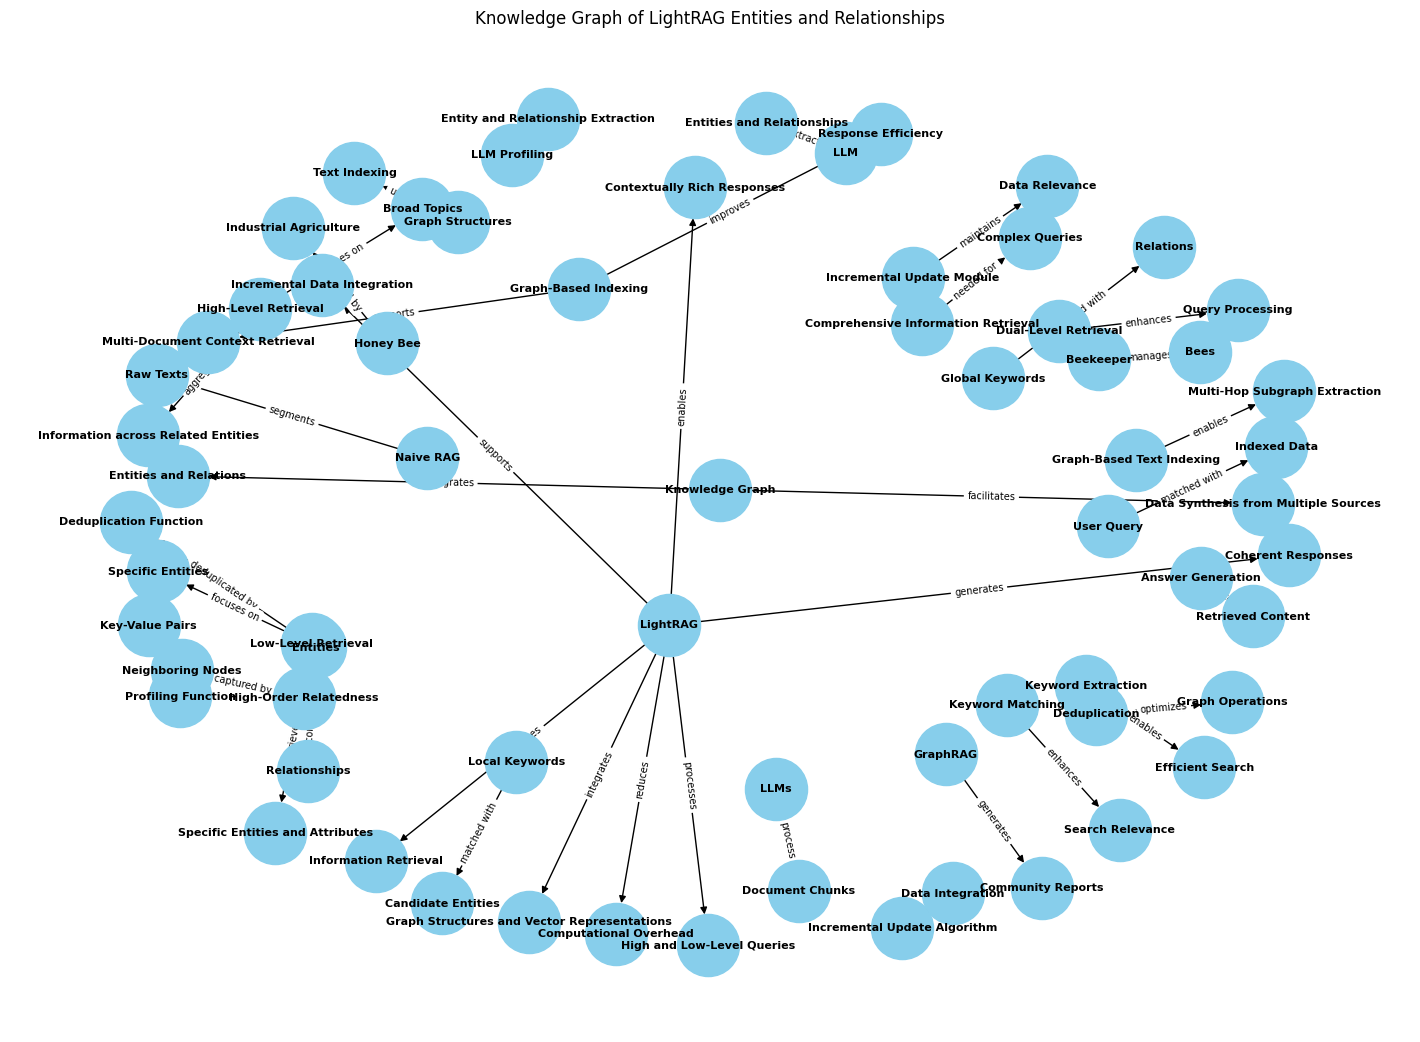

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Defining the triplets provided as (source, relationship, target)
triplets = [
    ("Beekeeper", "manages", "Bees"),
    ("Honey Bee", "impacted by", "Industrial Agriculture"),
    ("Graph Structures", "used in", "Text Indexing"),
    ("LightRAG", "enhances", "Information Retrieval"),
    ("LLMs", "process", "Document Chunks"),
    ("Entities", "connected to", "Relationships"),
    ("Knowledge Graph", "integrates", "Entities and Relations"),
    ("Incremental Update Algorithm", "supports", "Data Integration"),
    ("Dual-Level Retrieval", "enhances", "Query Processing"),
    ("LightRAG", "integrates", "Graph Structures and Vector Representations"),
    ("Low-Level Retrieval", "focuses on", "Specific Entities"),
    ("High-Level Retrieval", "focuses on", "Broad Topics"),
    ("LightRAG", "enables", "Contextually Rich Responses"),
    ("Graph-Based Text Indexing", "enables", "Multi-Hop Subgraph Extraction"),
    ("LLM", "extracts", "Entities and Relationships"),
    ("Profiling Function", "generates", "Key-Value Pairs"),
    ("Deduplication", "optimizes", "Graph Operations"),
    ("LightRAG", "supports", "Incremental Data Integration"),
    ("LLM Profiling", "enhances", "Entity and Relationship Extraction"),
    ("Naive RAG", "segments", "Raw Texts"),
    ("GraphRAG", "generates", "Community Reports"),
    ("User Query", "matched with", "Indexed Data"),
    ("LightRAG", "processes", "High and Low-Level Queries"),
    ("Comprehensive Information Retrieval", "needed for", "Complex Queries"),
    ("Graph-Based Indexing", "supports", "Multi-Document Context Retrieval"),
    ("Knowledge Graph", "facilitates", "Data Synthesis from Multiple Sources"),
    ("Retrieved Content", "utilized in", "Answer Generation"),
    ("Low-Level Retrieval", "retrieves", "Specific Entities and Attributes"),
    ("High-Level Retrieval", "aggregates", "Information across Related Entities"),
    ("Keyword Extraction", "enables", "Efficient Search"),
    ("Local Keywords", "matched with", "Candidate Entities"),
    ("Global Keywords", "matched with", "Relations"),
    ("Keyword Matching", "enhances", "Search Relevance"),
    ("LightRAG", "generates", "Coherent Responses"),
    ("Graph-Based Indexing", "improves", "Response Efficiency"),
    ("LightRAG", "reduces", "Computational Overhead"),
    ("Incremental Update Module", "maintains", "Data Relevance"),
    ("Entities", "deduplicated by", "Deduplication Function"),
    ("High-Order Relatedness", "captured by", "Neighboring Nodes")
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph from triplets
for source, relationship, target in triplets:
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, label=relationship)

# Plotting the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.3, seed=42)  # layout for a better spread of nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=8, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.5)
plt.title("Knowledge Graph of LightRAG Entities and Relationships")
plt.show()


In [ ]:
#!pip install https://huggingface.co/spacy/en_core_web_sm/resolve/main/en_core_web_sm-any-py3-none-any.whl

# Using spacy.load().
# import spacy 
# # print(spacy.__version__)

# nlp = spacy.load("en_core_web_sm")
# nlp

# # Importing as module.
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [2]:
# import spacy
# import en_core_web_sm
# nlp = en_core_web_sm.load()
import re

# def extract_entities(query):
#     doc = nlp(query)
#     return [ent.text for ent in doc.ents]

def extract_known_entities(query, graph):
    # Using regex to match entities in a case-insensitive manner
    return [term for term in graph if re.search(rf'\b{term}\b', query, re.IGNORECASE)]

def expand_query_with_graph(graph, entities, max_hops=2):
    expanded_terms = {}
    for entity in entities:
        if entity in graph:
            related_terms = set()
            for neighbor in nx.single_source_shortest_path_length(graph, entity, cutoff=max_hops):
                if neighbor != entity:
                    related_terms.add(neighbor)
            expanded_terms[entity] = related_terms
        else:
            print(f"Entity '{entity}' not found in the knowledge graph.")
            expanded_terms[entity] = set()
    return expanded_terms

# query = "How are LightRAG and GraphRAG different?"
# query = "what is Information Retrieval and LightRAG?"
# query = "what is Graph-Based Indexing and LightRAG?"
# query = "How does LightRAG uses local keywords?"
query = "How is LightRAG better than GraphRAG?"


# entities = extract_entities(query)
entities = extract_known_entities(query, G)
print(f"Extracted entities: {entities}")

expanded_entities = expand_query_with_graph(G, entities, max_hops=2)
print("Expanded entities and terms:")
for entity, terms in expanded_entities.items():
    print(f"{entity}- {terms}")


Extracted entities: ['LightRAG', 'GraphRAG']
Expanded entities and terms:
LightRAG- {'Coherent Responses', 'Contextually Rich Responses', 'Information Retrieval', 'Graph Structures and Vector Representations', 'High and Low-Level Queries', 'Incremental Data Integration', 'Computational Overhead'}
GraphRAG- {'Community Reports'}


In [3]:
from transformers import pipeline

# Initialize the Hugging Face pipeline
model_name = "facebook/bart-large-cnn"  # You can use other text2text generation models if preferred
text_generator = pipeline("text2text-generation", model=model_name)


# Expanded nodes from the knowledge graph (assuming LightRAG is the core entity in the example)
expanded_entities = {
    "LightRAG": {"Incremental Data Integration", "Graph Structures and Vector Representations", "Contextually Rich Responses"}
}

# Dynamically construct the context from expanded_entities
context = ". ".join(term for terms in expanded_entities.values() for term in terms)

# Define the input prompt with the query and context
input_text = f"Expand the following query with relevant information:\n\nQuery: {query}\n\nContext: {context}\n\nExpanded Query:"

# Generate the expanded query
response = text_generator(input_text, max_length=100, do_sample=True, top_k=50)

# Output the expanded query
expanded_query = response[0]['generated_text']
print("Expanded Query:", expanded_query)


c:\Users\Yashna Satyan\.conda\envs\spacy_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Expanded Query: Expanded query: How is LightRAG better than GraphRAG? Context: Contextually Rich Responses. Incremental Data Integration. Graph Structures and Vector Representations. Expanded Query: How are LightRAG and GraphRAG different? How do they compare? How are they different? Expanded Question: How do you compare?


In [6]:
from transformers import pipeline

# Initialize the Hugging Face pipeline
model_name = "facebook/bart-large-cnn"  # You can use other text2text generation models if preferred
text_generator = pipeline("text2text-generation", model=model_name)

# Expanded nodes from the knowledge graph (assuming LightRAG is the core entity in the example)
expanded_entities = {
    "LightRAG": {"Incremental Data Integration", "Graph Structures and Vector Representations", "Contextually Rich Responses"}
}

# Dynamically construct the context from expanded_entities
context = ". ".join(term for terms in expanded_entities.values() for term in terms)

# Original query
query = "How are LightRAG and GraphRAG different?"
# query = "How is LightRAG better than GraphRAG?"

# Define the input prompt with the query and context
input_text = f"Expand the following query with relevant information:\n\nQuery: {query}\n\nContext: {context}\n\nExpanded Query:"

# Generate the expanded query
response = text_generator(input_text, max_length=100, do_sample=True, top_k=50)

# Extract the generated expanded query text
expanded_query_text = response[0]['generated_text']

# Remove direct terms from expanded_entities and any duplicate phrases
# Convert expanded_entities to a set for easy lookup
excluded_terms = set(term for terms in expanded_entities.values() for term in terms)

# Filter out sentences containing excluded terms
filtered_sentences = [
    sentence.strip() for sentence in expanded_query_text.split('. ')
    if not any(term in sentence for term in excluded_terms)
]

# Remove duplicates while preserving order
seen = set()
unique_sentences = [sentence for sentence in filtered_sentences if not (sentence in seen or seen.add(sentence))]

# Join the unique sentences to form the final expanded query
cleaned_expanded_query = ". ".join(unique_sentences)

# Format the final output
print(f"Original Query: {query}")
print(f"Expanded Query: {query} {cleaned_expanded_query}")


Original Query: How are LightRAG and GraphRAG different?
Expanded Query: How are LightRAG and GraphRAG different? Expanded Query: How is LightRAG different from GraphRAG? Expanded query: How does LightRAG compare to GraphRAG for you?


In [5]:
from transformers import pipeline

# Initialize the Hugging Face pipeline
model_name = "facebook/bart-large-cnn"  # You can use other text2text generation models if preferred
text_generator = pipeline("text2text-generation", model=model_name)

# Expanded nodes from the knowledge graph (assuming LightRAG is the core entity in the example)
expanded_entities = {
    "LightRAG": {"Incremental Data Integration", "Graph Structures and Vector Representations", "Contextually Rich Responses"}
}

# Dynamically construct the context from expanded_entities
context = ". ".join(term for terms in expanded_entities.values() for term in terms)

# Original query
# query = "How are LightRAG and GraphRAG different?"
query = "How is LightRAG better than GraphRAG?"

# Define the input prompt with the query and context
input_text = f"Expand the following query with relevant information:\n\nQuery: {query}\n\nContext: {context}\n\nExpanded Query:"

# Generate the expanded query
response = text_generator(input_text, max_length=100, do_sample=True, top_k=50)

# Extract and format the expanded query output
expanded_query_text = response[0]['generated_text']

# Remove unwanted labels and concatenate with the original query
expanded_query = expanded_query_text.replace("Context:", "").replace("Question:", "").strip()

# Format the final output
print(f"Original Query: {query}")
print(f"Expanded Query: {query} {expanded_query}")


Original Query: How is LightRAG better than GraphRAG?
Expanded Query: How is LightRAG better than GraphRAG? Expanded Query: How is LightRAG better than GraphRAG?  Contextually Rich Responses. Incremental Data Integration. Graph Structures and Vector Representations. Expand the following query with relevant information: inquire about LightRAG and GraphRAG. For more information on LightRAG, visit the LightRAG website or the GraphRAG website.


In [4]:
# from transformers import pipeline

# # Initialize the Hugging Face pipeline
# model_name = "google-t5/t5-base"  # You can use other text2text generation models if preferred
# text_generator = pipeline("translation", model=model_name)

# # Original query
# query = "What is LightRAG?"

# # Expanded nodes from the knowledge graph
# expanded_entities = {
#     "LightRAG": {"Incremental Data Integration", "Graph Structures and Vector Representations", "Contextually Rich Responses"}
# }

# # Dynamically construct the context from expanded_entities
# context = ", ".join(term for terms in expanded_entities.values() for term in terms)

# # Define a minimal prompt to expand the query without extra instructions
# input_text = f"Expand the query: '{query} in a very short and to the point manner' including concepts like {context}."

# # Generate the expanded query
# response = text_generator(input_text, max_length=50, do_sample=False)

# # Output only the expanded query text
# expanded_query = response[0]['generated_text']
# print("Expanded Query:", expanded_query)


from transformers import pipeline

# Initialize the Hugging Face pipeline
model_name = "t5-base"  # Correct model identifier for T5-base on Hugging Face
text_generator = pipeline("text2text-generation", model=model_name)



# Expanded nodes from the knowledge graph
expanded_entities = {
    "LightRAG": {"Incremental Data Integration", "Graph Structures and Vector Representations", "Contextually Rich Responses"}
}

# Dynamically construct the context from expanded_entities
context = ", ".join(term for terms in expanded_entities.values() for term in terms)

# Define a more explicit prompt to encourage expansion
input_text = f"Expand the question '{query}' to include details about concepts such as {context}. Do not answer; only expand the question."

# Generate the expanded query
response = text_generator(input_text, max_length=70, do_sample=False)

# Output only the expanded query text
expanded_query = response[0]['generated_text']
print("Expanded Query:", expanded_query)




Expanded Query: Expand the question 'How are LightRAG and GraphRAG different?' to include details about concepts such as Graph Structures and Vector Representations, Contextually Rich Responses, Incremental Data Integration.
